# **Task 2 :**
The Goal of this Project is to Develop a image classification model to distinguish between the images of dogs and cats.

In [15]:
#importing libraries
import pandas as pd
import numpy as np

In [16]:
train_path = '/kaggle/input/cats-and-dogs-image-classification/train'
test_path = '/kaggle/input/cats-and-dogs-image-classification/test'

# Data Augmentation

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
#data augmentation for the for the training variable
train_datagen = ImageDataGenerator(
   rescale=1.0/255,                # Rescale pixel values to [0, 1]
    rotation_range=20,              # Random rotation within 20 degrees
    width_shift_range=0.2,          # Random horizontal shift by 20% of image width
    height_shift_range=0.2,         # Random vertical shift by 20% of image height
    horizontal_flip=True,           # Random horizontal flipping
    fill_mode='nearest'             # Fill mode for new pixels after shifts/rotations
)

In [20]:
size_images = 200
batch_size = 64

In [21]:
train_generator = train_datagen.flow_from_directory(train_path,                     # Path to the training data
    target_size=(size_images, size_images),  # Resize images to this size
    batch_size=batch_size,           # Number of images in each batch
    seed=32,                         # Optional: Set a random seed for shuffling
    shuffle=True,                    # Shuffle the data during training
    class_mode='categorical'        # Mode for class labels (categorical for one-hot encoding)
)

Found 557 images belonging to 2 classes.


In [22]:
test_datagen = ImageDataGenerator( test_path,
    rescale=1.0/255,                # Rescale pixel values to [0, 1]
    rotation_range=20,              # Random rotation within 20 degrees
    width_shift_range=0.2,          # Random horizontal shift by 20% of image width
    height_shift_range=0.2,         # Random vertical shift by 20% of image height
    horizontal_flip=True,           # Random horizontal flipping
    fill_mode='nearest'             # Fill mode for new pixels after shifts/rotations
)

In [23]:
test_generator = test_datagen.flow_from_directory(test_path,
    target_size=(size_images, size_images),
    batch_size = batch_size,
    class_mode='categorical')

Found 140 images belonging to 2 classes.


In [24]:
import matplotlib.pyplot as plt

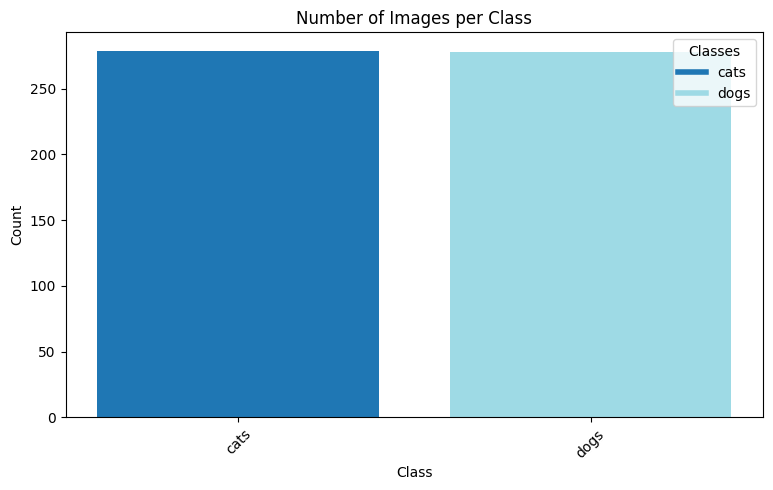

In [25]:
# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Calculate the count of images per class
class_counts = {label: 0 for label in class_labels}

for i in range(len(train_generator)):
    batch_data, batch_labels = train_generator[i]
    for j in range(len(batch_data)):
        class_idx = int(batch_labels[j].argmax())
        class_label = class_labels[class_idx]
        class_counts[class_label] += 1

# Define unique colors for each class
class_colors = plt.cm.tab20(np.linspace(0, 1, len(class_labels)))

# Create a bar chart with different colors for each class
plt.figure(figsize=(9, 5))
bars = plt.bar(class_counts.keys(), class_counts.values(), color=class_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)

# Add a legend for class colors
legend_labels = [plt.Line2D([0], [0], color=class_colors[i], lw=4, label=class_labels[i]) for i in range(len(class_labels))]
plt.legend(handles=legend_labels, title="Classes")

plt.show()

In [26]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [27]:
from keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


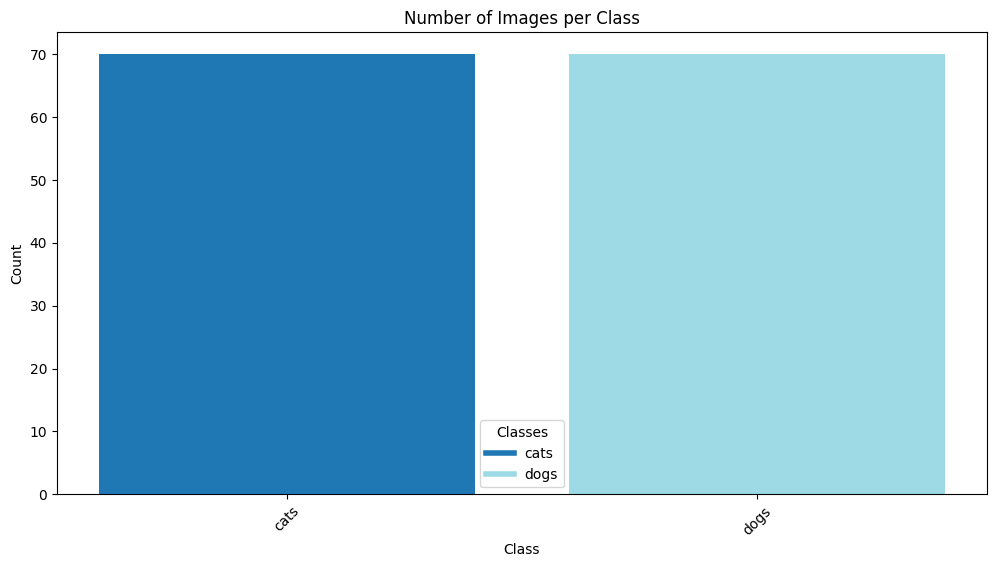

In [28]:
# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Calculate the count of images per class
class_counts = {label: 0 for label in class_labels}

for i in range(len(test_generator)):
    batch_data, batch_labels = test_generator[i]
    for j in range(len(batch_data)):
        class_idx = int(batch_labels[j].argmax())
        class_label = class_labels[class_idx]
        class_counts[class_label] += 1

# Define unique colors for each class
class_colors = plt.cm.tab20(np.linspace(0, 1, len(class_labels)))

# Create a bar chart with different colors for each class
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color=class_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)

# Add a legend for class colors
legend_labels = [plt.Line2D([0], [0], color=class_colors[i], lw=4, label=class_labels[i]) for i in range(len(class_labels))]
plt.legend(handles=legend_labels, title="Classes")

plt.show()

In [29]:
def Show_Images(target_gen):
    # Get a batch of images and labels
    batch_images, batch_labels = next(target_gen)

    # Get class labels
    class_labels = list(target_gen.class_indices.keys())

    # Display images with labels
    plt.figure(figsize=(20, 20))
    for n , i in enumerate(list(np.random.randint(0,len(batch_images),36))):
        plt.subplot(6, 6, n + 1)
        plt.imshow(batch_images[i])
        plt.title(class_labels[np.argmax(batch_labels[i])])  # Display the class label
        plt.axis('off')
    plt.show()

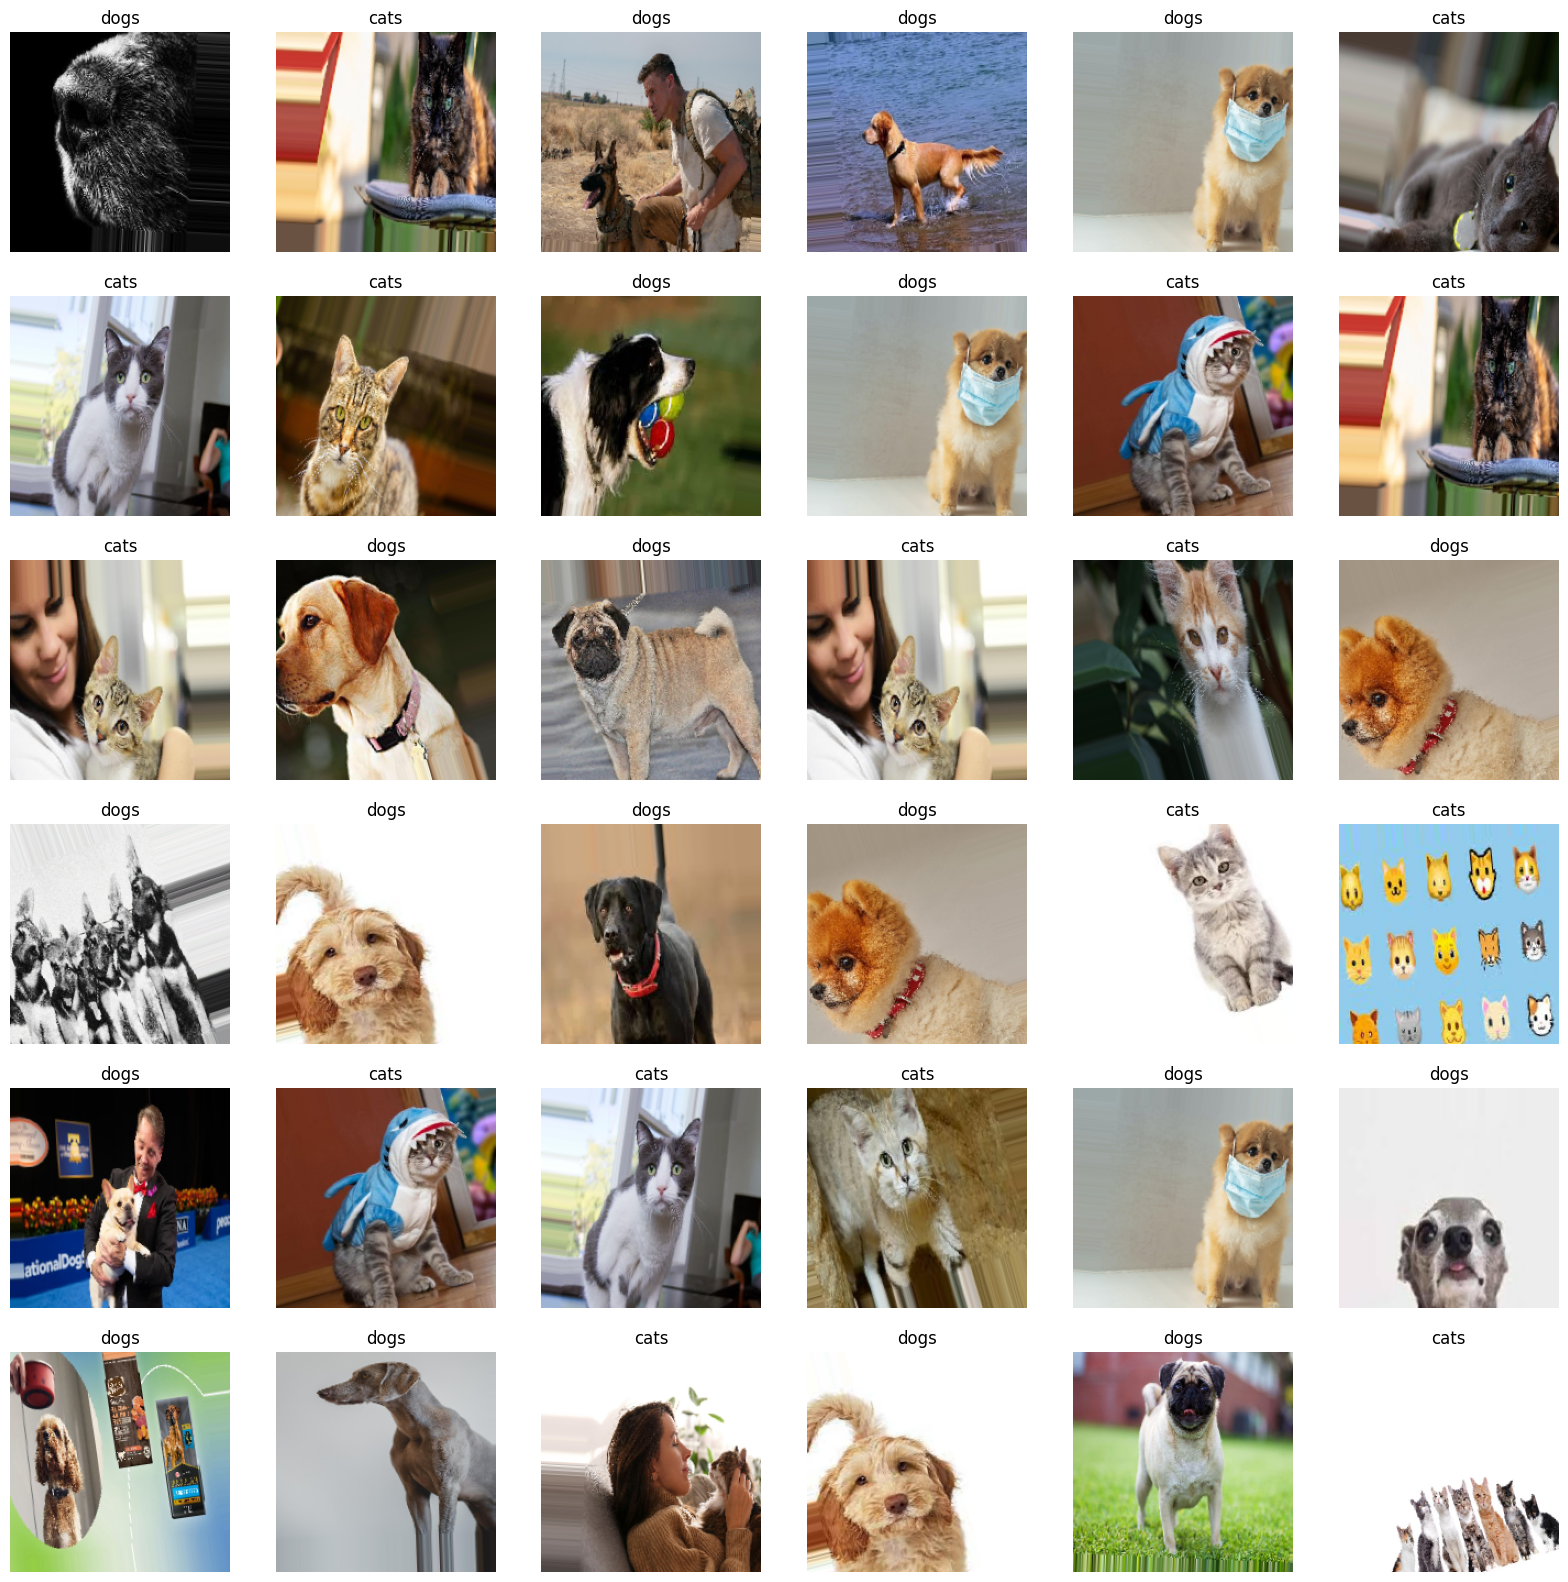

In [30]:
Show_Images(train_generator)

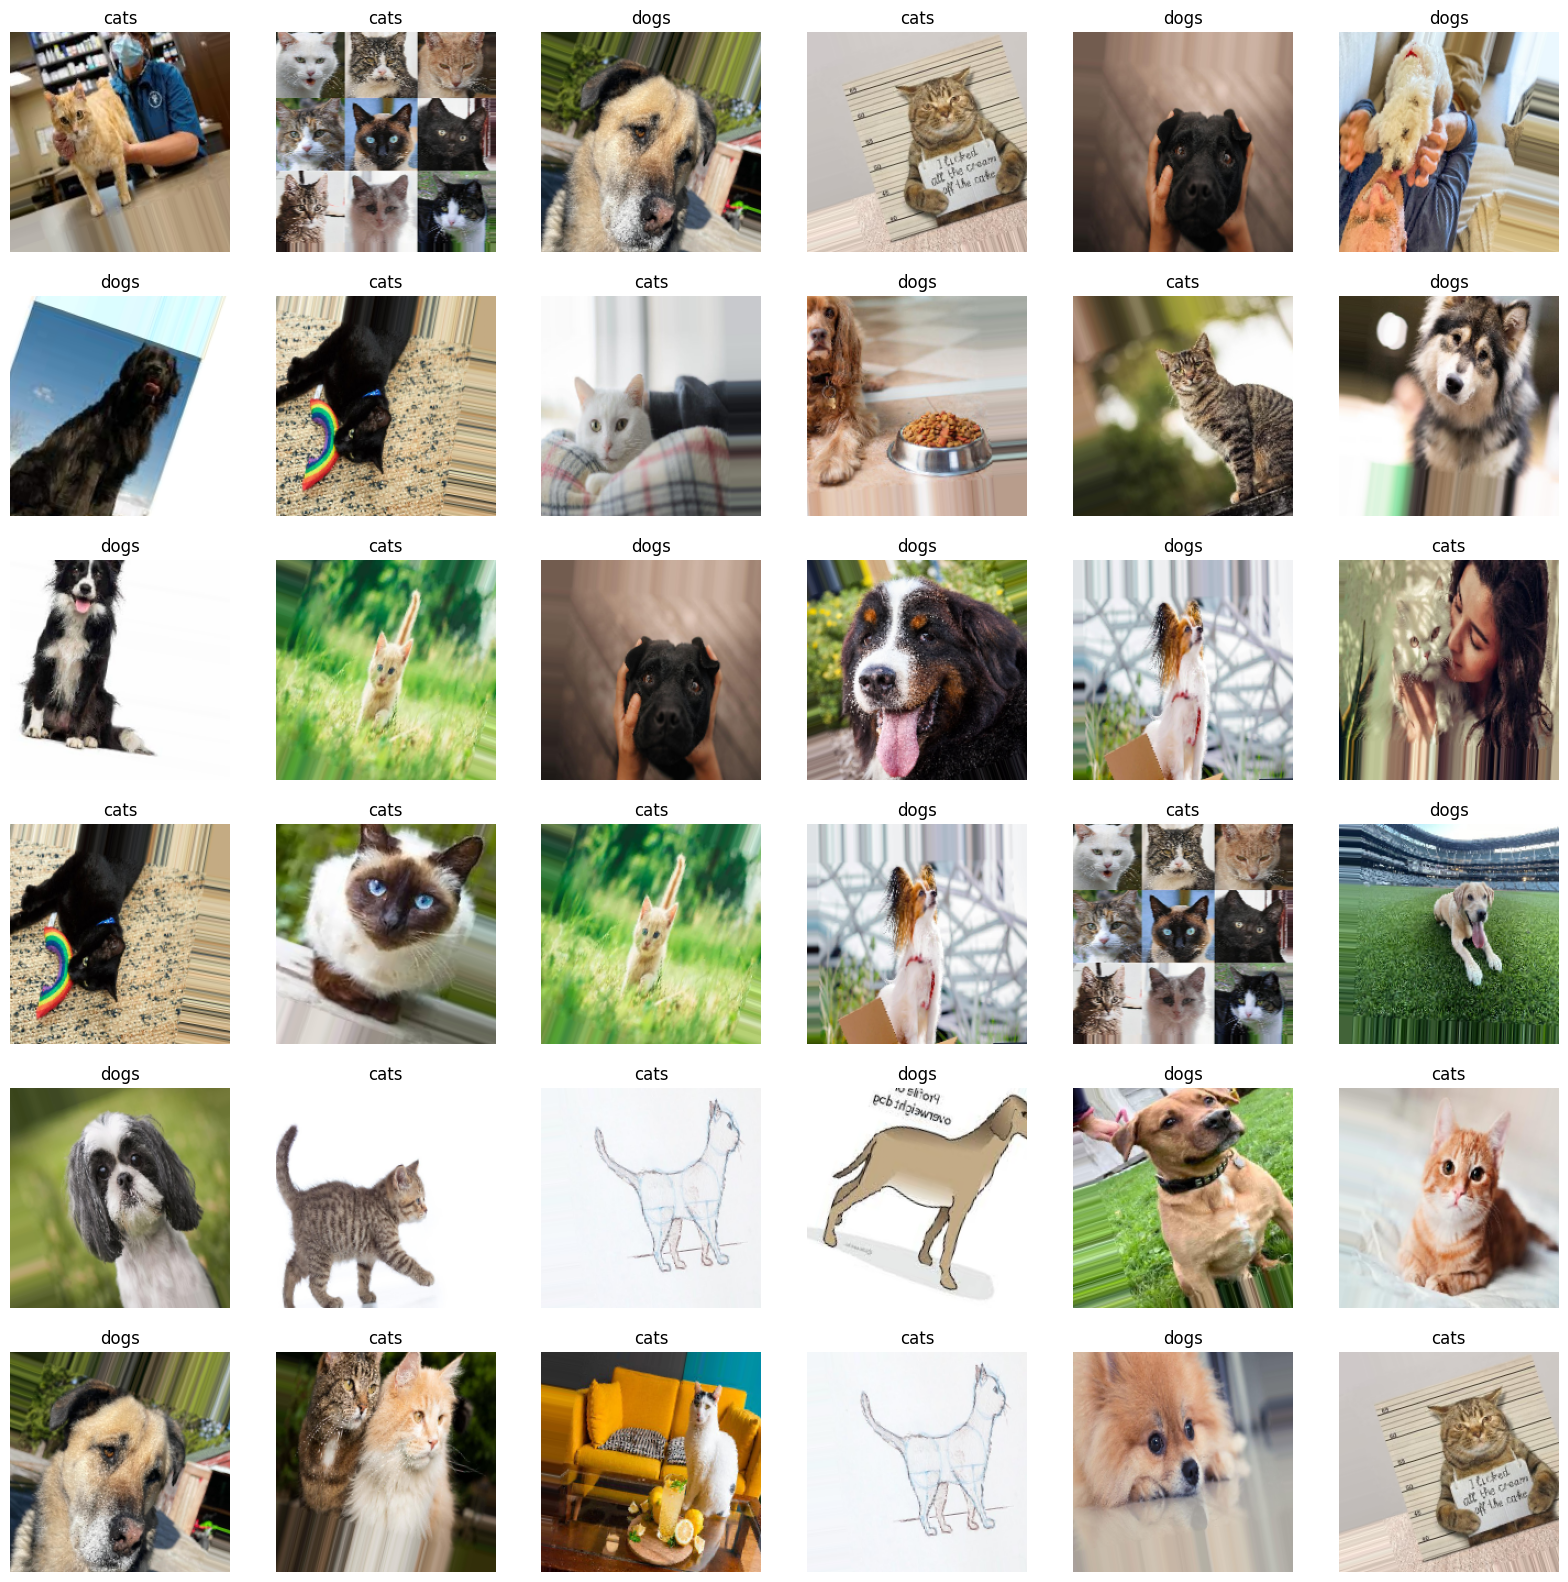

In [31]:
Show_Images(test_generator)

# **Early Stopping**
 This prevents the model from continuing to fit the training data too closely, which can lead to overfitting.

In [32]:
from keras.callbacks import EarlyStopping


In [33]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# **Reduction learning_rate**
Reduction of the learning rate means decreasing the step size (learning rate) during training to help a machine learning model converge more effectively and avoid convergence issues.

In [34]:
from keras.callbacks import ReduceLROnPlateau


In [35]:
learning_rate_reduce = ReduceLROnPlateau(
    monitor='val_acc',   # Metric to monitor for changes (usually validation accuracy)
    patience=5,          # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,           # Verbosity mode (0: silent, 1: update messages)
    factor=0.5,          # Factor by which the learning rate will be reduced (e.g., 0.5 means halving)
    min_lr=0.00001       # Lower bound for the learning rate (it won't go below this value)
)

# **Exponential Decay**
Formula:
New Value = Initial Value × Decay Rate ^(Step Count)

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
from tensorflow.keras import optimizers

# Create a learning rate schedule using Exponential Decay
learning_rate_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,  # Initial learning rate for training
    decay_steps=1000,            # Number of steps before decaying the learning rate
    decay_rate=0.5,              # Rate at which the learning rate decreases
)


In [38]:
from keras.callbacks import LearningRateScheduler

# Create a Learning Rate Scheduler callback using a pre-defined schedule
lr_callback = LearningRateScheduler(learning_rate_schedule)
callback=[ lr_callback , learning_rate_reduce ,early_stopping ]

# **Transfer Learning**

# DeseNet-121v2

We have choosen this model for training our model due to Dense Connectivity , parameter efficiency and Gradient flow.

In [39]:
from keras.applications.densenet import DenseNet121


In [40]:
#getting weights from DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(size_images, size_images, 3))


29084464/29084464 [==============================] - 0s 0us/step


In [41]:
# Freeze the layers of the desnet121
for layer in base_model.layers:
    layer.trainable = False

# **Building the Model**

In [42]:
model = tf.keras.models.Sequential([
    base_model,

    layers.Flatten(),

    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2,activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 6, 6, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 256)               9437440   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1

In [43]:
#setting optimizer
optimizer = optimizers.Adam(learning_rate=learning_rate_schedule)

In [44]:
model.compile(optimizer=optimizer,
             loss="categorical_crossentropy",
              metrics=['accuracy']
             )

In [45]:
#training model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[callback]
)

Epoch 1/5
8/8 [==============================] - 73s 8s/step - loss: 59.9345 - accuracy: 0.5314 - val_loss: 8.8145 - val_accuracy: 0.6719 - lr: 0.0100
Epoch 2/5
8/8 [==============================] - 51s 6s/step - loss: 4.7364 - accuracy: 0.8093 - val_loss: 3.2031 - val_accuracy: 0.8594 - lr: 0.0099
Epoch 3/5
8/8 [==============================] - 50s 6s/step - loss: 1.0916 - accuracy: 0.8966 - val_loss: 1.0339 - val_accuracy: 0.8516 - lr: 0.0098
Epoch 4/5
8/8 [==============================] - 61s 8s/step - loss: 0.2927 - accuracy: 0.9067 - val_loss: 0.2550 - val_accuracy: 0.9297 - lr: 0.0098
Epoch 5/5
8/8 [==============================] - 51s 6s/step - loss: 0.1991 - accuracy: 0.9270 - val_loss: 0.2113 - val_accuracy: 0.9141 - lr: 0.0097


In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint('best_model_weights.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

history = model.fit(train_generator,
                    epochs=5,
                    callbacks=[checkpoint],
                    validation_data=test_generator)

Epoch 1/5
9/9 [==============================] - ETA: 0s - loss: 0.1786 - accuracy: 0.9228
Epoch 1: val_accuracy improved from -inf to 0.91429, saving model to best_model_weights.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 66s 8s/step - loss: 0.1786 - accuracy: 0.9228 - val_loss: 0.3037 - val_accuracy: 0.9143
Epoch 2/5
9/9 [==============================] - ETA: 0s - loss: 0.1615 - accuracy: 0.9354
Epoch 2: val_accuracy improved from 0.91429 to 0.92857, saving model to best_model_weights.h5
9/9 [==============================] - 65s 7s/step - loss: 0.1615 - accuracy: 0.9354 - val_loss: 0.5149 - val_accuracy: 0.9286
Epoch 3/5
9/9 [==============================] - ETA: 0s - loss: 0.1454 - accuracy: 0.9336
Epoch 3: val_accuracy improved from 0.92857 to 0.93571, saving model to best_model_weights.h5
9/9 [==============================] - 65s 7s/step - loss: 0.1454 - accuracy: 0.9336 - val_loss: 0.5143 - val_accuracy: 0.9357
Epoch 4/5
9/9 [==============================] - ETA: 0s - loss: 0.1340 - accuracy: 0.9300
Epoch 4: val_accuracy did not improve from 0.93571
9/9 [==============================] - 65s 7s/step - loss: 0.1340 - accuracy: 0.9300 - val_loss: 0.8694 - v

In [47]:
#evaluating model
score = model.evaluate(test_generator, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.49869057536125183
Test accuracy: 0.9071428775787354


**Accuracy Graph**

<Figure size 640x480 with 0 Axes>

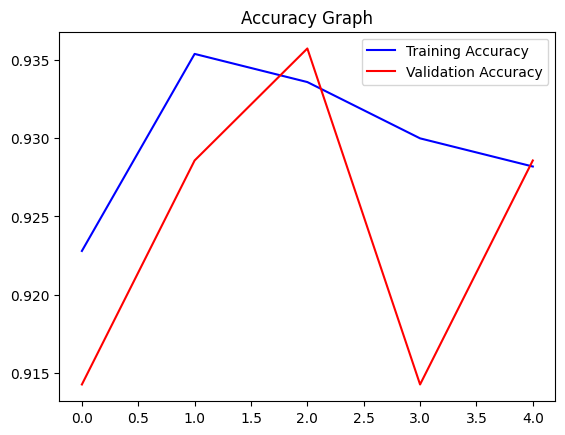

<Figure size 640x480 with 0 Axes>

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

**Loss Graph**

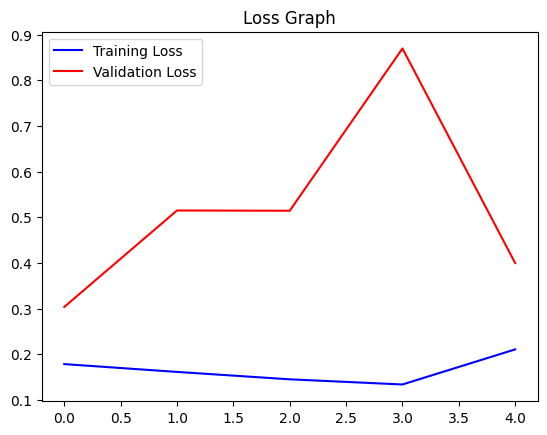

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

**Confusion Matrix**

In [52]:
from sklearn.metrics import confusion_matrix


/opt/conda/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


3/3 [==============================] - 11s 3s/step


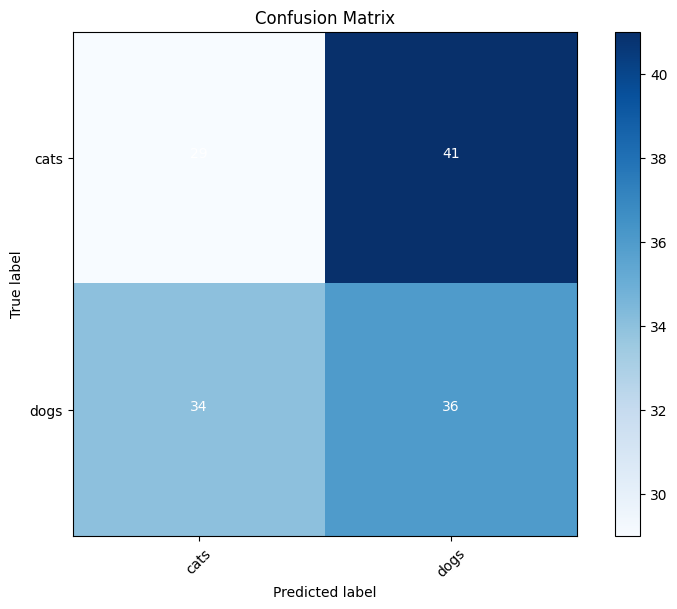

In [53]:
import itertools

# Make predictions on the test data
predictions = model.predict(test_generator)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test_generator
true_labels = test_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class names (assuming you have class_names defined)
class_names = test_generator.class_indices.keys()

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, title="Confusion Matrix")
plt.show()

# **Generating Predictions for TestData**

3/3 [==============================] - 12s 3s/step


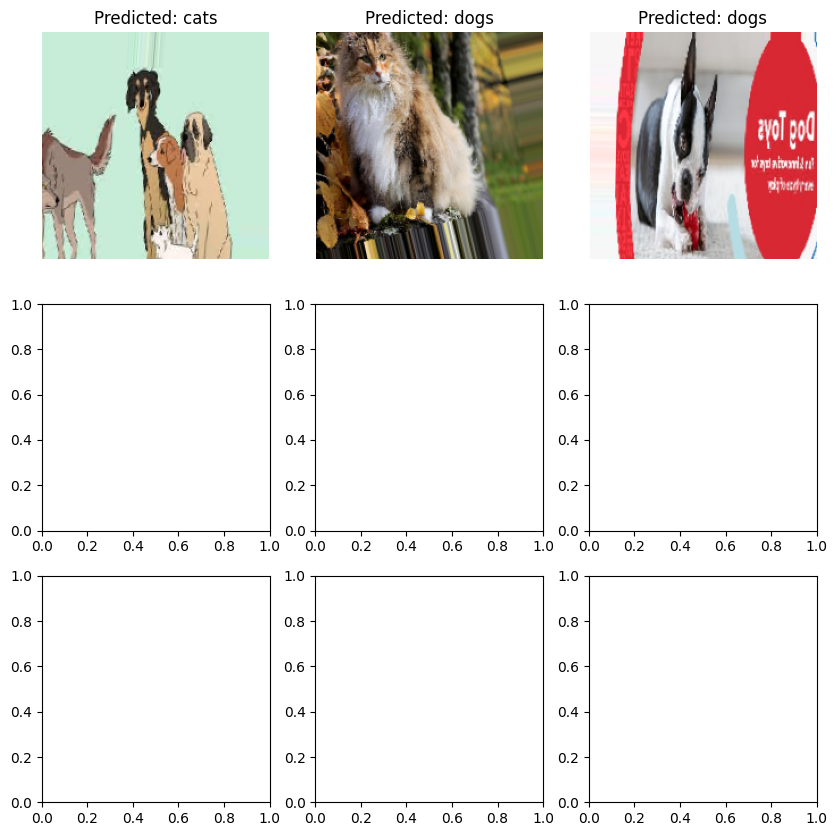

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [77]:
# Generate predictions for the test data
predictions = model.predict(test_generator)

# Retrieve true labels from the generator (assuming class_mode is 'categorical')
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Plot images with true and predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i in range(len(test_generator)):
    plt.figure(figsize=(6, 6))
    
    ax = axes[i // 3, i % 3]
    image = test_generator[i][0][1]  
    ax.imshow(image)

    
    # True label
    true_label = class_labels[true_labels[i]]
    
    # Predicted label
    predicted_label = class_labels[np.argmax(predictions[i])]
    
    ax.set_title(f'Predicted: {predicted_label}')
    ax.axis('off')
    
plt.show()